![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor, lu_solve

# Calculando um autovalor qualquer

## Questão 1: Iteração inversa

Podemos calcular um autovalor da matriz $A$ próximo de $a$
ao calcular um autovalor da matriz $M = (A - aI)^{-1}$.
Observe que "multiplicar" por $M$ é equivalente a resolver o sistema linear com matriz $A - aI$,
o que permite usar `np.linalg.solve` para fazer as iterações.

Obs: note que, após calcular um par autovetor-autovalor de $M$,
será necessário fazer operações simples para converter em um par autovetor-autovalor de $A$.

In [2]:
def any_eigen(A, a, tol=1e-6):
    """
    Encontra o par autovetor-autovalor de 'A' de autovalor mais próximo de 'a'.
    Retorna, também, o número de iterações.
    """
    n,m = np.shape(A)
    assert n==m, 'A must be square'
    u = np.random.rand(n)
    z = u/np.linalg.norm(u)
    M = A - a*np.eye(n)
    lu, p = lu_factor(M)
    residuo = 1000
    l = niter = 0
    while(residuo > tol):
        u = lu_solve((lu,p),z)
        norm = np.linalg.norm(u)
        l = np.dot(u,z)
        residuo = np.linalg.norm(A@z-(a+1/l)*z)
        z = u / norm
        niter += 1
    return z,a+1/l,niter

In [3]:
A = np.array([[125,5],[0,300]])
u, l, n = any_eigen(A, 234.567)
assert np.allclose(A@u, l*u, rtol=1e-4)

In [4]:
A = np.array([[125,5],[0,300]])
u, l, n = any_eigen(A, 234.567, tol=1e-8)
assert np.allclose(A@u, l*u, rtol=1e-6)

In [5]:
A = np.array([[125,5],[0,300]])
u, l, n = any_eigen(A, 234.567, tol=1e-10)
assert np.allclose(A@u, l*u, rtol=1e-8)

Qual o erro entre $Au$ e $\lambda u$?
Como você explica isso, dadas as tolerâncias?

In [6]:
np.linalg.norm(A@u-l*u)

4.594650417070886e-11

O erro é na ordem de 1e-11. O erro utilizada no algoritmo foi a distância euclidiana entre $Au$ e $\lambda u$. Assim, dada que a tolerância é na ordem de 1e-10, é natural se pensar que o erro teria de ser menor do que isso. No entanto, se utilizássemos simplesmente a tolerância em cada dimensão do vetor $Au - \lambda u$, então a diferença ao final poderia ser maior do que 1e-8. Isso porque, a cada valor $x_i$ do vetor $Au - \lambda u$ é tal que $x_i \leq 1e-8$. A norma, que é calculada por $\sqrt{\sum x_i^2}$, poderia ser maior que $1e-8$ .

In [7]:
np.random.seed(99)
u1, l1, n1 = any_eigen(A, 234.567, tol=1e-8)
u2, l2, n2 = any_eigen(A, 234.567, tol=1e-8)
assert np.allclose(u1, u2)
assert np.isclose(l1, l2)
print(n1, n2)

48 54


Explique os testes e o `print` da caixa acima.

Vemos que, dependendo do chute do vetor inicial, temos mais ou menos iterações até o algoritmo convergir.

## Questão 2: Velocidade de convergência I

Faça um gráfico do número de iterações necessários, em função da tolerância,
para encontrar o autovalor mais próximo de 234.567 da matriz

$$ A = \begin{bmatrix} 125 & 5 \\ 0 & 300 \end{bmatrix}. $$

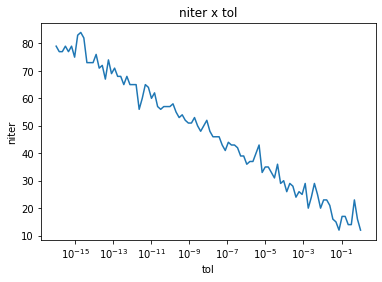

In [8]:
tols = np.logspace(0,-16,100)
ns = []
for tol in tols:
    u, l, n = any_eigen(A, 234.567, tol=tol)
    ns.append(n)
plt.plot(tols,ns)
plt.xscale("log")
plt.xlabel("tol")
plt.ylabel("niter")
plt.title("niter x tol")
ax = plt.gca()

In [9]:
assert len(ax.lines) == 1
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

In [10]:
l = ax.lines[0]
xs = l.get_xdata()
ys = l.get_ydata()
assert min(xs) < 1e-10 < 1e-3 < max(xs)
assert 2 < min(ys) < 20 < max(ys) < 100

In [11]:
ax = None

O que você observa do gráfico?

Percebe-se que quanto maior a tolerância, menor a quantidade de iterações. Além disso, percebemos que esse decrescimento é aproximadamente linear com a tolerância na escala logarítmica. O fato de usar um chute inicial diferente a cada tolerância faz com que esse gráfico tenha pequenas variações.

## Questão 3: Velocidade de convergência II

Agora, considere diferentes "chutes" para os autovalores de $A$ entre 1 e 1000,
e faça um gráfico com as velocidades de convergência para todos eles.

In [12]:
for i in range(170):
    any_eigen(A,10,tol=1e-16)

In [13]:
%time u, l, n = any_eigen(A, 234.567, tol=1e-10)

CPU times: user 7.54 ms, sys: 2.2 ms, total: 9.74 ms
Wall time: 11.5 ms


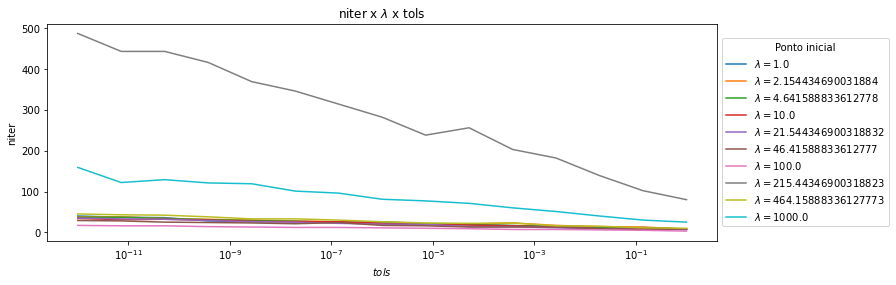

In [14]:
plt.figure(figsize=(12,4))
chutes = np.logspace(0,3,num=10)
tols = np.logspace(0,-12,num=15)
for chute in chutes:
    temp=[]
    for tol in tols:
        u, l, n = any_eigen(A, chute, tol=tol)
        temp.append(n)
    plt.plot(tols,temp,label=f"$\lambda = ${chute}")
plt.legend(title="Ponto inicial", loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.xlabel("$tols$")
plt.ylabel("niter")
plt.xscale("log")
plt.title("niter x $\lambda$ x tols")
ax = plt.gca()

In [16]:
assert len(ax.lines) == 10
assert ax.get_title() != ""

In [15]:
for x in chutes:
    print(x,"---",max([abs(x-125),abs(x-300)]))

1.0 --- 299.0
2.154434690031884 --- 297.8455653099681
4.641588833612778 --- 295.3584111663872
10.0 --- 290.0
21.544346900318832 --- 278.4556530996812
46.41588833612777 --- 253.58411166387222
100.0 --- 200.0
215.44346900318823 --- 90.44346900318823
464.15888336127773 --- 339.15888336127773
1000.0 --- 875.0


In [17]:
ax = None

O que você percebe no gráfico anterior?
Se necessário, faça outro gráfico, ou outras contas.

Aplicando a função max() para pegar a maior distancia entre cada chute inicial e os autovalores 125 e 300 da matriz, percebe-se que todos os chutes que possuem a máxima distância "d" até um dos autovalores entre [90,875], então o número de iterações é menor que 200. Em outras palavras, se $90\leq d=\max{(|125-chute|,|300-chute|)}\leq 875$, então numero iterações é menor que 200 (as distâncias 90 e 875 são, possivelmente, valores para os quais temos o máximo local do número de iterações).    

## Questão 4: Velocidade de convergência III

Agora, considere as matrizes:

$$ \begin{align*}
A_x  & = \begin{bmatrix} 125 & x \\ 0 & 300 \end{bmatrix} \\
\end{align*} $$

com $x$ variando entre $1$ e $1000$.

Quais são os autovalores destas matrizes?

Obtendo a equação característica, temos que:
$
A = \begin{bmatrix}
125 - \lambda & x\\
0 & 300 - \lambda\\
\end{bmatrix}\\
det(A) = (125 - \lambda)(300 - \lambda) - 0x = 37500 - 425\lambda + \lambda^2\\
\lambda = \frac{425 +/- 175}{2}\\
\lambda = 300\\
\lambda = 125
$
<p>
 Assim, como calculando o determinante temos um termo $0x$, para qualquer valor de x temos que os autovalores são 125 e 300.

Faça um gráfico do número de iterações em função da tolerância, sempre começando de 234.567,
para as várias matrizes $A_x$.

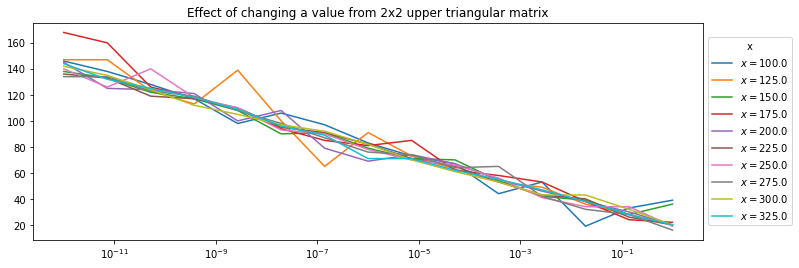

In [18]:
plt.figure(figsize=(12,4))
xs = np.linspace(100,325,10)
tols = np.logspace(0,-12,num=15)
for x in xs:
    temp=[]
    A[0,1] = x
    for tol in tols:
        u, l, n = any_eigen(A, chute, tol=tol)
        temp.append(n)
    plt.plot(tols,temp,label=f"$x = ${x}")
plt.xscale("log")
plt.legend(title="x", loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.title("Effect of changing a value from 2x2 upper triangular matrix")
ax = plt.gca()

In [19]:
assert len(ax.lines) >= 10
assert ax.get_title() != ""

In [20]:
ax = None

O que mudou?
Porquê você acha que isso acontece?

Dessa vez todos os gráficos foram identicos entre si, embora alguns pontos as curvas distoaram bastante do padrão de decrescimento das demais (possivelmente o autovetor estimado inicialmente não foi tão bom). Esse comportamento similar se deve ao fato de que o valor de x não influencia em nada os autovalores e autovetores da matriz em questão.  